In [38]:
pwd

'C:\\Users\\adity\\Data Science folder'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mall=pd.read_csv(r"C:\Users\adity\Downloads\Mall_Customers.csv")

In [3]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall.value_counts()

CustomerID  Genre   Age  Annual Income (k$)  Spending Score (1-100)
1           Male    19   15                  39                        1
138         Male    32   73                  73                        1
128         Male    40   71                  95                        1
129         Male    59   71                  11                        1
130         Male    38   71                  75                        1
                                                                      ..
70          Female  32   48                  47                        1
71          Male    70   49                  55                        1
72          Female  47   49                  42                        1
73          Female  60   50                  49                        1
200         Male    30   137                 83                        1
Length: 200, dtype: int64

In [5]:
mall.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [6]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


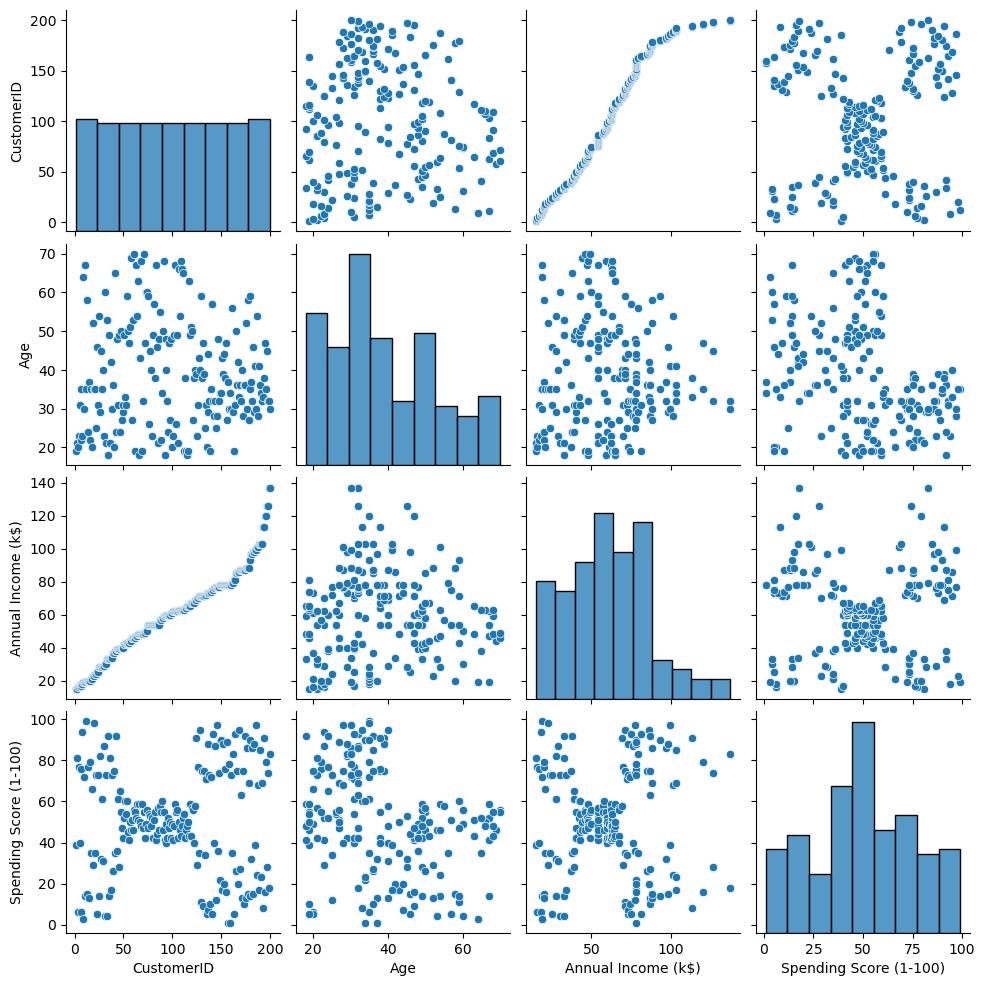

In [7]:
sns.pairplot(data=mall)
plt.show()

In [8]:
# train_test_split

In [42]:
mall=mall.drop('CustomerID',axis=1)

In [43]:
mall.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [44]:
mall['Genre']=mall['Genre'].apply(str)

In [46]:
obj=mall.select_dtypes(include=object)

In [47]:
num=mall.select_dtypes(exclude=object)

In [48]:
obt=pd.get_dummies(obj,drop_first=True)

In [56]:
obt=obt.astype(int)

In [57]:
mdata=pd.concat([num,obt],axis=1)

In [58]:
mdata.head().dtypes

Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Genre_Male                int32
dtype: object

In [59]:
mdata.columns


Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male'], dtype='object')

In [61]:
X=mdata.drop('Spending Score (1-100)',axis=1)

In [62]:
y=mdata['Spending Score (1-100)']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model=LinearRegression()

In [67]:
model.fit(X_train,y_train)

LinearRegression()

In [68]:
predicted_val=model.predict(X_test)

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test,predicted_val)
sme=mean_squared_error(y_test,predicted_val)
rsme=np.sqrt(sme)

In [73]:
mae

19.21446105091831

In [74]:
rsme

22.110868998125106

In [75]:
y_test.mean()

56.5

In [76]:
from joblib import dump,load

In [77]:
dump(model,'Myfirstmodel.joblib')

['Myfirstmodel.joblib']

In [78]:
mdata.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
